In [59]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoImageProcessor,AutoModel
from PIL import Image
import requests

In [60]:
# url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
url= 'https://media.istockphoto.com/id/183249275/photo/english-grammar-text-handwritten-on-greenboard.jpg?s=612x612&w=0&k=20&c=1BoFsJLhFwtqTP-_S-z6c_0OOnuqYLHe-BNYKmZ6mRA='
path=r'1_p.jpg'


In [61]:
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

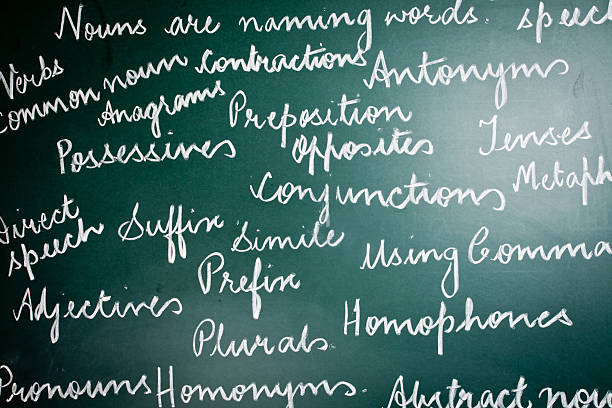

In [62]:
image

In [63]:
# processor = TrOCRProcessor.from_pretrained('dayyass/trocr-base-handwritten-vit-encoder')
# model = VisionEncoderDecoderModel.from_pretrained('dayyass/trocr-base-handwritten-vit-encoder')

processor = AutoImageProcessor.from_pretrained("dayyass/trocr-base-handwritten-vit-encoder")
model = AutoModel.from_pretrained("dayyass/trocr-base-handwritten-vit-encoder")



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [66]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values

In [67]:
pixel_values

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -0.4431,  0.1216,  0.7176],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4667,  0.1765,  0.7098],
          [-1.0000, -1.0000, -1.0000,  ..., -0.3882,  0.4510,  0.8275],
          ...,
          [-0.9765, -0.9843, -0.9765,  ..., -0.6471,  0.4588,  0.6706],
          [-0.9608, -0.9294, -0.9922,  ..., -0.8588,  0.1765,  0.8039],
          [-0.9686, -0.9843, -0.9373,  ..., -0.9922, -0.6941,  0.2863]],

         [[-0.9608, -0.9608, -0.9608,  ..., -0.1529,  0.2941,  0.7255],
          [-0.9608, -0.9608, -0.9608,  ..., -0.1843,  0.3490,  0.7020],
          [-0.9608, -0.9608, -0.9608,  ..., -0.1059,  0.6000,  0.8196],
          ...,
          [-0.9451, -0.9216, -0.9059,  ..., -0.4510,  0.6157,  0.7176],
          [-0.9216, -0.8824, -0.9686,  ..., -0.6314,  0.3647,  0.8510],
          [-0.8902, -0.9529, -0.9294,  ..., -0.7804, -0.5843,  0.3255]],

         [[-0.9922, -0.9922, -0.9922,  ..., -0.1686,  0.2941,  0.7725],
          [-0.9922, -0.9922, -

In [69]:
import torch
with torch.no_grad():
    outputs = model(pixel_values)

In [70]:
last_hidden_states = outputs.last_hidden_state

list(last_hidden_states.shape)

[1, 577, 768]

tensor([[[ 0.0839,  0.6623, -0.9141,  ..., -0.4036,  0.4818, -1.4882],
         [-0.0993, -0.1899, -0.2762,  ...,  0.2796, -0.8934,  0.1182],
         [ 1.0631, -0.6095, -0.2798,  ...,  1.1823, -0.1706,  0.2966],
         ...,
         [-0.4025, -0.1489,  0.0360,  ..., -0.3540,  0.5103, -0.5770],
         [-0.0558,  0.0860,  0.3360,  ...,  0.4992,  0.3199,  0.9047],
         [ 0.0945, -0.2852,  0.2969,  ...,  0.2066,  0.0799,  0.6707]]])

In [65]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

TypeError: The current model class (ViTModel) is not compatible with `.generate()`, as it doesn't have a language model head.

In [56]:
generated_text

'1953 The New Zealand Government of Australia'